In [3]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Подлючаем данные
data = pd.read_csv('C:/Users/wonde/virtualenvs/tensorflow/Scripts/MyFolderForMMOLabs/googleplaystore.csv', sep=",")

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
data.shape

(10841, 13)

In [10]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers'))

In [11]:
vectorizer = TfidfVectorizer()
vectorizer.fit(newsgroups_train.data + newsgroups_test.data)

TfidfVectorizer()

In [12]:
X_train = vectorizer.transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [13]:
def test(model,ax):
    print(model)
    model.fit(X_train, y_train)
    print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))
    #print("Confusion_matrix:", confusion_matrix(y_test, model.predict(X_test), labels = np.unique(model.predict(X_test))))
    plot_confusion_matrix(model, X_test, y_test, 
                          display_labels=newsgroups_test.target_names, 
                          cmap=plt.cm.Blues, ax=ax)

LinearSVC()
Accuracy: 0.8048327137546468


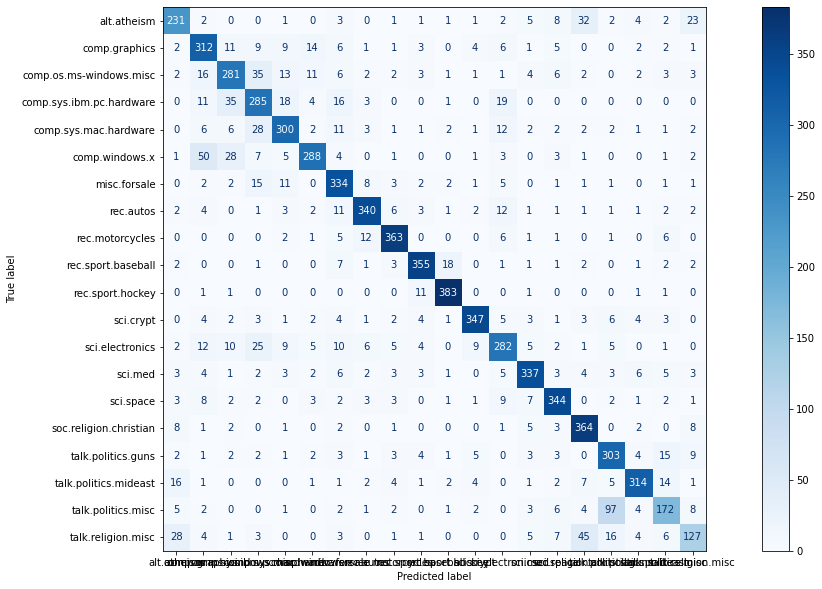

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
test(LinearSVC(), ax)

LogisticRegression()
Accuracy: 0.774429102496017


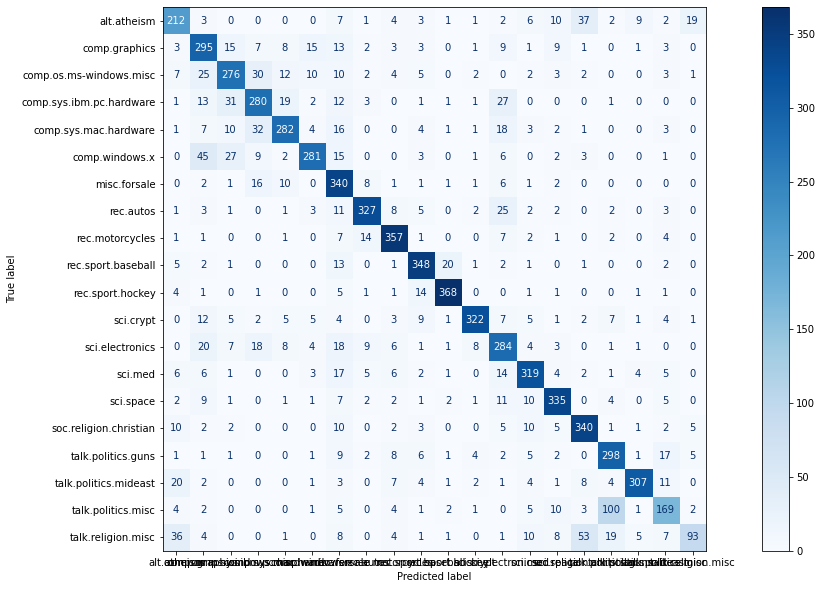

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
test(LogisticRegression(), ax)

MultinomialNB()
Accuracy: 0.72623473181094


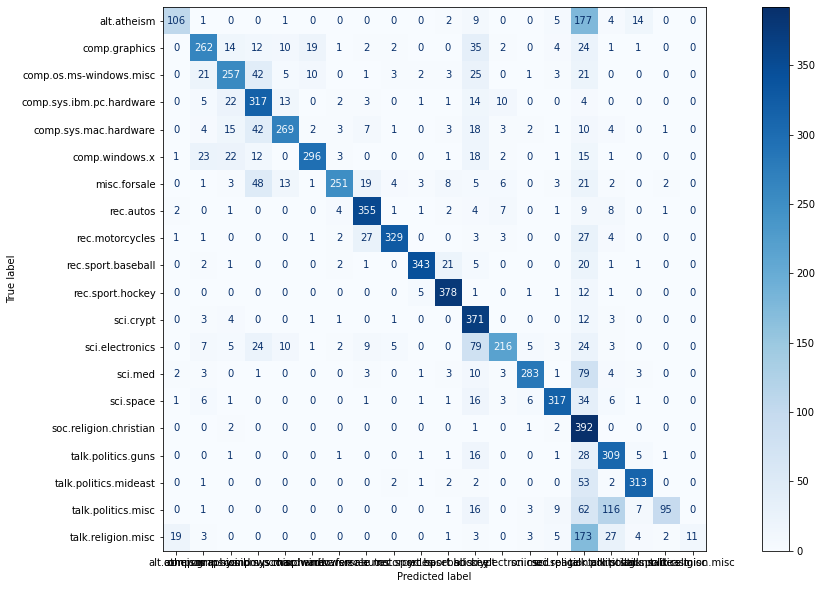

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
test(MultinomialNB(),ax)

ComplementNB()
Accuracy: 0.8089484864577802


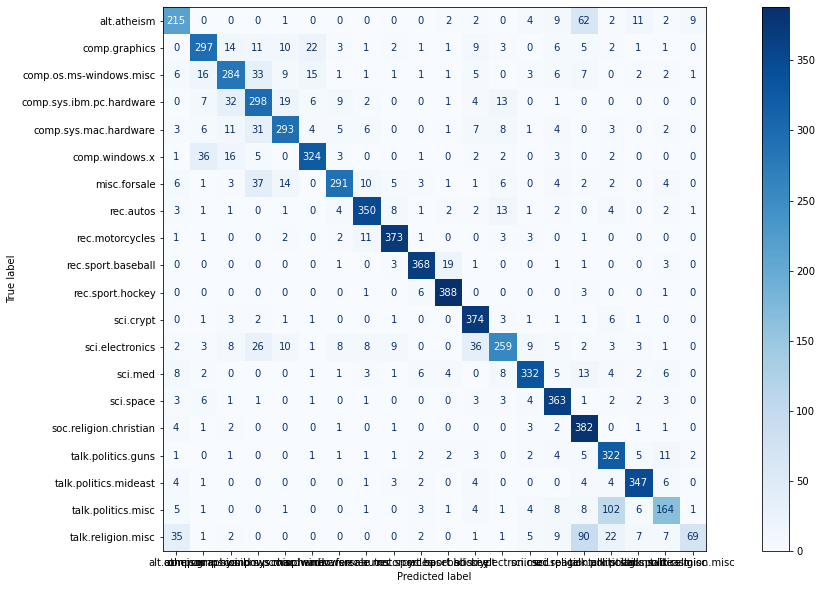

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
test(ComplementNB(),ax)

BernoulliNB()
Accuracy: 0.5371747211895911


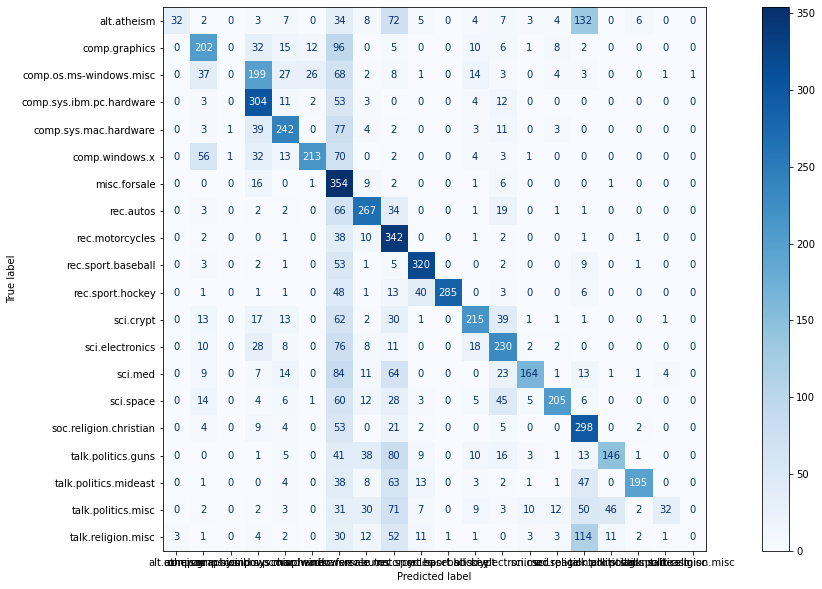

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
test(BernoulliNB(),ax)

### Вывод

Для выбранного набора данных более качественная классификация была получена при помощи метода Complement Naive Bayes.